# Preprocessing for Deep Learning: From covariance matrix to image whitening

*The goal of this post/notebook is to go from the basics of data preprocessing to modern techniques used in deep learning. My point is that we can use code (Python/Numpy etc.) to better understand abstract mathematical notions!*

![](https://cdn-images-1.medium.com/max/2000/1*SFLQ7qs5TpCsLMedFgtLMA.jpeg)

The goal of this post is to go from the basics of data preprocessing to modern techniques used in deep learning. My point is that we can use code (such as Python/NumPy) to better understand abstract mathematical notions. Thinking by coding! 💥

We will start with basic but very useful concepts in data science and machine learning/deep learning, like variance and covariance matrices. We will go further to some preprocessing techniques used to feed images into neural networks. We will try to get more concrete insights using code to actually see what each equation is doing.

**Preprocessing** refers to all the transformations on the raw data before it is fed to the machine learning or deep learning algorithm. For instance, training a convolutional neural network on raw images will probably lead to bad classification performances ([Pal & Sudeep, 2016](https://ieeexplore.ieee.org/document/7808140/)). The preprocessing is also important to speed up training (for instance, centering and scaling techniques, see [Lecun et al., 2012; see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)).

Here is the syllabus of this tutorial:

1. **Background:** In the first part, we will get some reminders about variance and covariance. We will see how to generate and plot fake data to get a better understanding of these concepts.

2. **Preprocessing:** In the second part we will see the basics of some preprocessing techniques that can be applied to any kind of data — **mean normalization, standardization**, and **whitening**.

3. **Whitening images:** In the third part, we will use the tools and concepts gained in 1. and 2. to do a special kind of whitening called **Zero Component Analysis** (ZCA). It can be used to preprocess images for deep learning. This part will be very practical and fun ☃️!

Feel free to fork [the notebook associated with this post](https://github.com/hadrienj/Preprocessing-for-deep-learning)! For instance, check the shapes of the matrices each time you have a doubt.

## 1. Background

### A. Variance and covariance

The variance of a variable describes how much the values are spread. The covariance is a measure that tells the amount of dependency between two variables.

A positive covariance means that the values of the first variable are large when values of the second variables are also large. A negative covariance means the opposite: large values from one variable are associated with small values of the other.

The covariance value depends on the scale of the variable so it is hard to analyze it. It is possible to use the correlation coefficient that is easier to interpret. The correlation coefficient is just the normalized covariance.

![](https://cdn-images-1.medium.com/max/800/1*GH0ou22oJEwAw89GkrS8-w.png)
<center><i> A positive covariance means that large values of one variable are associated with big values from the other (left). A negative covariance means that large values of one variable are associated with small values of the other one (right). </i></center>
<br>

The covariance matrix is a matrix that summarises the variances and covariances of a set of vectors and it can tell a lot of things about your variables. The diagonal corresponds to the variance of each vector:

![](https://cdn-images-1.medium.com/max/800/1*5V2y7dyc7YclTRqdVjoOrQ.png)
<center><i> A matrix <b>A</b> and its matrix of covariance. The diagonal corresponds to the variance of each column vector. </i></center>
<br>

Let’s just check with the formula of the variance:

$$V(X) = \frac{1}{n} \sum^n_{i=1}(x_i - \bar{x})^2$$

with **n** the length of the vector, and **x̄** the mean of the vector. For instance, the variance of the first column vector of **A** is:

$$ V(A_{:,1}) = \frac{(1-3)^2 + (5-3)^2 + (3-3)^2}{3} = 2.67 $$


This is the first cell of our covariance matrix. The second element on the diagonal corresponds of the variance of the second column vector from **A** and so on.

Note: the vectors extracted from the matrix **A** correspond to the columns of **A**.

The other cells correspond to the covariance between two column vectors from **A**. For instance, the covariance between the first and the third column is located in the covariance matrix as the column 1 and the row 3 (or the column 3 and the row 1).

![](https://cdn-images-1.medium.com/max/800/1*Ce3wTRBXCJUG7fFf95CQ9Q.png)

<center><i>The position in the covariance matrix. Column corresponds to the first variable and row to the second (or the opposite). The covariance between the first and the third column vector of **A** is the element in column 1 and row 3 (or the opposite = same value).</i></center>
<br>

Let’s check that the covariance between the first and the third column vector of **A** is equal to -2.67. The formula of the covariance between two variables **X** and **Y** is:

$$ cov(X, Y) = \frac{1}{n} \sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y}) $$

The variables **X** and **Y** are the first and the third column vectors in the last example. Let’s split this formula to be sure that it is crystal clear:

1. The sum symbol (Σ) means that we will iterate on the elements of the vectors. We will start with the first element (i=1) and calculate the first element of X minus the mean of the vector X.

$$ (x_i-\bar{x}) $$

<br>

2. Multiply the result with the first element of Y minus the mean of the vector Y.

$$ (x_i-\bar{x})(y_i-\bar{y}) $$

<br>

3. Reiterate the process for each element of the vectors and calculate the sum of all results.

$$ \sum^n_{i=1} (x_i-\bar{x})(y_i-\bar{y}) $$

<br>

4. Divide by the number of elements in the vector.

$$ \frac{1}{n} \sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y}) $$

<br>

#### Example 1.

Let’s start with the matrix **A:**

$$A = \begin{bmatrix}
    1 & 3 & 5 \\
    5 & 4 & 1 \\
    3 & 8 & 6
\end{bmatrix}$$

We will calculate the covariance between the first and the third column vectors:

$$X = \begin{bmatrix}
    1 \\
    5 \\
    3
\end{bmatrix}$$

and

$$Y = \begin{bmatrix}
    5 \\
    1 \\
    6
\end{bmatrix}$$

$\bar{x}=3$, $\bar{y}=4$ , and $n=3$ so we have:

$$ cov(X,Y)= \frac{(1-3)(5-4)+(5-3)(1-4)+(3-3)(6-4)}{3}=\frac{-8}{3}=-2.67 $$

Ok, great! That’s the value of the covariance matrix.

**Now the easy way.** With NumPy, the covariance matrix can be calculated with the function np.cov.

**It is worth noting** that if you want NumPy to use the columns as vectors, the parameter rowvar=False has to be used. Also, bias=True divides by **n** and not by **n-1**.

Let’s create the array first:

In [10]:
# First things first: let's import some libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

Now we will calculate the covariance with the NumPy function:

In [11]:
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

Looks good!

#### Finding the covariance matrix with the dot product

There is another way to compute the covariance matrix of **A**. You can center **A** around 0. The mean of the vector is subtracted from each element of the vector to have a vector with mean equal to 0. It is multiplied with its own transpose, and divided by the number of observations.

Let’s start with an implementation and then we’ll try to understand the link with the previous equation:

In [12]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

Let’s test it on our matrix A:

In [13]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

We end up with the same result as before.

The explanation is simple. The dot product between two vectors can be expressed:

$$ X^TY = \sum^n_{i=1}(x_i)(y_i) $$

That’s right, it is the sum of the products of each element of the vectors:

![](https://cdn-images-1.medium.com/max/800/1*6zDuuYJtL6yiuE1CatrYDQ.png)

The dot product corresponds to the sum of the products of each element of the vectors.

If **n** is the number of elements in our vectors and that we divide by **n**:

$$ \frac{1}{n}X^TY = \frac{1}{n}\sum^n_{i=1}(x_i)(y_i) $$

You can note that this is not too far from the formula of the covariance we have seen earlier:

$$ cov(X, Y) = \frac{1}{n} \sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y}) $$

The only difference is that, in the covariance formula, we subtract the mean of a vector from each of its elements. This is why we need to center the data before doing the dot product.

Now, if we have a matrix **A**, the dot product between **A** and its transpose will give you a new matrix:

![](https://cdn-images-1.medium.com/max/800/1*1Qw42RtGhHQWXD4rkA-MTQ.png)

If you start with a zero-centered matrix, the dot product between this matrix and its transpose will give you the variance of each vector and covariance between them, that is to say the covariance matrix.

This is the covariance matrix!

### B. Visualize data and covariance matrices

In order to get more insights about the covariance matrix and how it can be useful, we will create a function to visualize it along with 2D data. You will be able to see the link between the covariance matrix and the data.

This function will calculate the covariance matrix as we have seen above. It will create two subplots — one for the covariance matrix and one for the data. The heatmap() function from [Seaborn](https://seaborn.pydata.org/) is used to create gradients of colour — small values will be coloured in light green and large values in dark blue. We chose one of our palette colours, but you may prefer other colours. The data is represented as a scatterplot.

In [14]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    
    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

### C. Simulating data

Now that we have the plot function, we will generate some random data to visualize what the covariance matrix can tell us. We will start with some data drawn from a normal distribution with the NumPy function np.random.normal().

![](https://cdn-images-1.medium.com/max/800/1*C5wwjainirV9mQHDlei9SQ.png)

<center><i> Drawing sample from a normal distribution with NumPy. </i></center>

This function will calculate the covariance matrix as we have seen above. It will create two subplots — one for the covariance matrix and one for the data. The heatmap() function from [Seaborn](https://seaborn.pydata.org/) is used to create gradients of colour — small values will be coloured in light green and large values in dark blue. We chose one of our palette colours, but you may prefer other colours. The data is represented as a scatterplot.

In [15]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

**Note 1**: We transpose the data with .T because the original shape is (2, 300) and we want the number of observations as rows (so with shape (300, 2)).

**Note 2**: We use np.random.seed function for reproducibility. The same random number will be used the next time we run the cell.

Let’s check how the data looks like:

In [16]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

Nice, we have two column vectors.

Now, we can check that the distributions are normal:

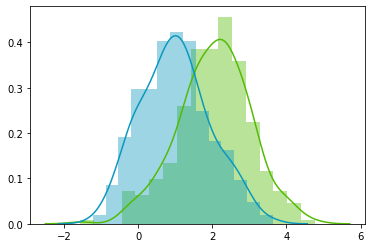

In [17]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

Looks good!

We can see that the distributions have equivalent standard deviations but different means (1 and 2). So that’s exactly what we have asked for.

Now we can plot our dataset and its covariance matrix with our function:

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


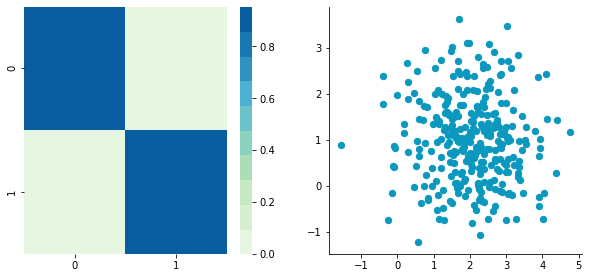

In [18]:
plotDataAndCov(A)
plt.show()
plt.close()

We can see on the scatterplot that the two dimensions are uncorrelated. Note that we have one dimension with a mean of 1 (y-axis) and the other with the mean of 2 (x-axis).

Also, the covariance matrix shows that the variance of each variable is very large (around 1) and the covariance of columns 1 and 2 is very small (around 0). Since we ensured that the two vectors are independent this is coherent. The opposite is not necessarily true: a covariance of 0 doesn’t guarantee independence (see [here](https://stats.stackexchange.com/questions/12842/covariance-and-independence)).

#### Correlated data

Now, let’s construct dependent data by specifying one column from the other one.

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


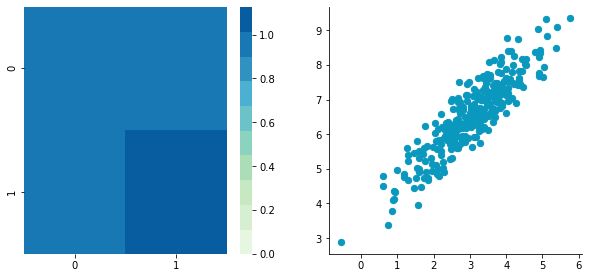

In [19]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

The correlation between the two dimensions is visible on the scatter plot. We can see that a line could be drawn and used to predict **y** from **x** and vice versa. The covariance matrix is not diagonal (there are non-zero cells outside of the diagonal). That means that the covariance between dimensions is non-zero.

That’s great! We now have all the tools to see different preprocessing techniques.

## 2. Preprocessing

<a id='section2a'></a>

### A. Mean normalization

Mean normalization is just removing the mean from each observation.

$$ X' = X - \bar{x} $$

where $X'$ is the normalized dataset, $X$ is the original dataset, and $\bar{x}$ is the mean of $X$.

Mean normalization has the effect of centering the data around 0. We will create the function `center()` to do that:

In [20]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Let’s give it a try with the matrix $B$ we have created earlier:

Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


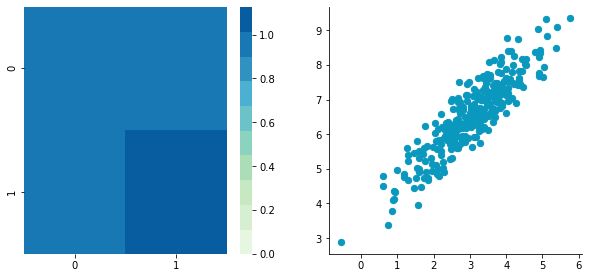

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


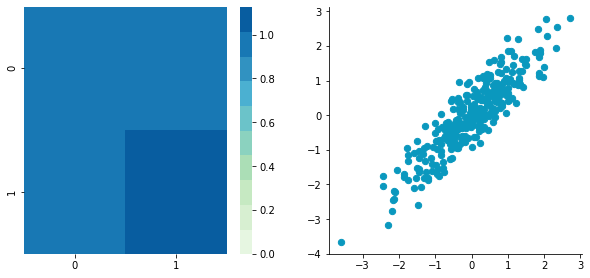

In [21]:
BCentered = center(B)

print('Before:\n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print('After:\n\n')

plotDataAndCov(BCentered)
plt.show()
plt.close()

The first plot shows again the original data $B$ and the second plot shows the centered data (look at the scale).

### B. Standardization or normalization

Standardization is used to put all features on the same scale. Each zero-centered dimension is divided by its standard deviation.

$$ X' = \frac{X-\bar{x}}{\sigma x} $$

where $X'$ is the standardized dataset, $X$ is the original dataset, $\bar{x}$ is the mean of $X$, and $\sigma$ is the standard deviation of $X$.

In [22]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Let’s create another dataset with a different scale to check that it is working.

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


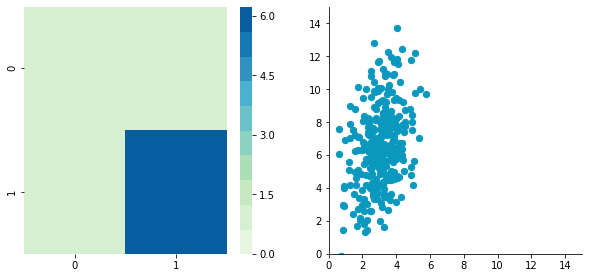

In [23]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

We can see that the scales of $x$ and $y$ are different. Note also that the correlation seems smaller because of the scale differences. Now let’s standardize it:

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


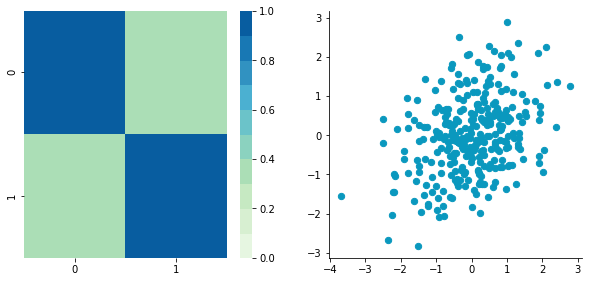

In [24]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

Looks good. You can see that the scales are the same and that the dataset is zero-centered according to both axes.

Now, have a look at the covariance matrix. You can see that the variance of each coordinate — the top-left cell and the bottom-right cell — is equal to 1.

This new covariance matrix is actually the correlation matrix. The Pearson correlation coefficient between the two variables ($c_1$ and $c_2$) is 0.54220151.

### C. Whitening

Whitening, or sphering, data means that we want to transform it to have a covariance matrix that is the identity matrix — 1 in the diagonal and 0 for the other cells. It is called whitening in reference to white noise.

[Here are more details on the identity matrix](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/).

Whitening is a bit more complicated than the other preprocessing, but we now have all the tools that we need to do it. It involves the following steps:

* Zero-center the data
* Decorrelate the data
* Rescale the data 

Let’s take again $C$ and try to do these steps.

#### 1. Zero-centering

This refers to mean normalization ([2. A](#section2a)). Check back for details about the center() function.

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


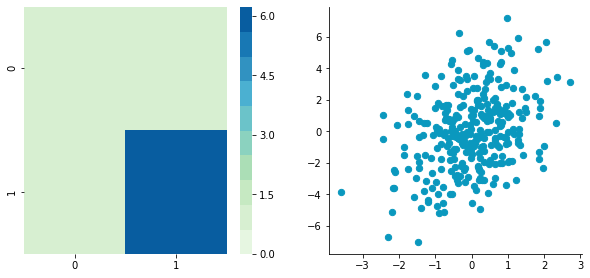

In [25]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

#### 2. Decorrelate

At this point, we need to decorrelate our data. Intuitively, it means that we want to rotate the data until there is no correlation anymore. Look at the following image to see what I mean:

![](https://cdn-images-1.medium.com/max/800/1*ehXogigFyLpyy2q2sz80HA.png)

The left plot shows correlated data. For instance, if you take a data point with a big $x$ value, chances are that the associated $y$ will also be quite big.

Now take all data points and do a rotation (maybe around 45 degrees counterclockwise. The new data, plotted on the right, is not correlated anymore. You can see that big and small $y$ values are related to the same kind of $x$ values.

The question is: how could we find the right rotation in order to get the uncorrelated data?

Actually, it is exactly what the eigenvectors of the covariance matrix do. They indicate the direction where the spread of the data is at its maximum:

![](https://cdn-images-1.medium.com/max/800/1*1SAoJ_o70IygSmDnKiCkmw.png)

The eigenvectors of the covariance matrix give you the direction that maximizes the variance. The direction of the **green** line is where the variance is maximum. Just look at the smallest and largest point projected on this line — the spread is big. Compare that with the projection on the **orange** line — the spread is very small.

For more details about eigendecomposition, see [this post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/).

So we can decorrelate the data by projecting it using the eigenvectors. This will have the effect to apply the rotation needed and remove correlations between the dimensions. Here are the steps:

* Calculate the covariance matrix
* Calculate the eigenvectors of the covariance matrix
* Apply the matrix of eigenvectors to the data — this will apply the rotation


Let’s pack that into a function: 

In [26]:
def decorrelate(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Let’s try to decorrelate our zero-centered matrix $C$ to see it in action:

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


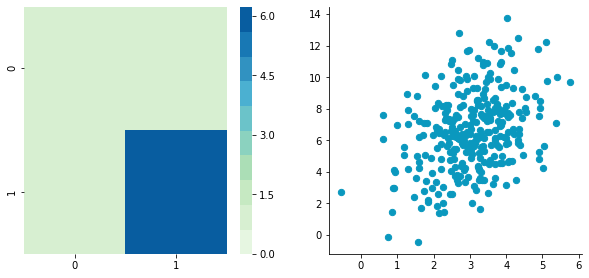

Covariance matrix:
 [[8.21222171e-01 8.28966525e-17]
 [8.28966525e-17 6.35579346e+00]]


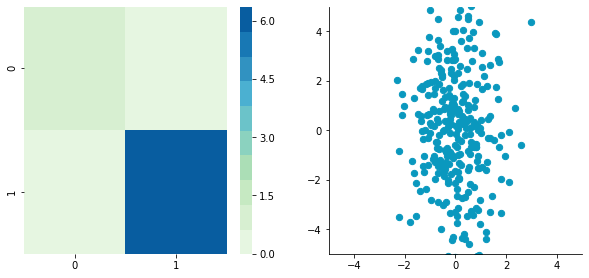

In [27]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

Nice! This is working.

We can see that the correlation is not here anymore. The covariance matrix, now a diagonal matrix, confirms that the covariance between the two dimensions is equal to 0.

#### 3. Rescale the data

The next step is to scale the uncorrelated matrix in order to obtain a covariance matrix corresponding to the identity matrix.To do that, we scale our decorrelated data by dividing each dimension by the square-root of its corresponding eigenvalue.

In [28]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

**Note**: we add a small value (here 10^-5) to avoid division by 0.

Covariance matrix:
 [[9.99987823e-01 2.51650552e-17]
 [2.51650552e-17 9.99998427e-01]]


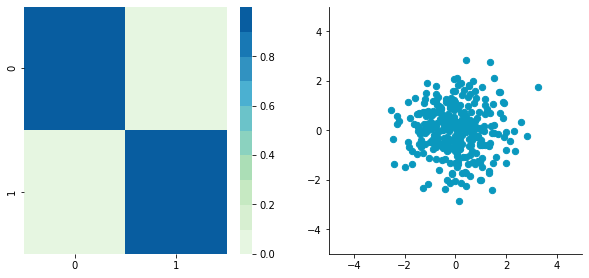

In [29]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

Hooray! We can see that with the covariance matrix that this is all good. We have something that looks like an identity matrix — 1 on the diagonal and 0 elsewhere.

## 3. Image Whitening

We will see how whitening can be applied to preprocess an image dataset. To do so we will use the paper of [Pal & Sudeep (2016)](https://ieeexplore.ieee.org/document/7808140/) where they give some details about the process. This preprocessing technique is called Zero component analysis (ZCA).

Check out the paper, but here is the kind of result they got. The original images (left) and the images after the ZCA (right) are shown.

![](https://cdn-images-1.medium.com/max/800/1*YyKLLSzcAMX_9cCBbjP2sg.png)

First things first. We will load images from the CIFAR dataset. This dataset is available from Keras and you can also download it here.

In [30]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

The training set of the CIFAR10 dataset contains 50000 images. The shape of X_train is (50000, 32, 32, 3). Each image is 32px by 32px and each pixel contains 3 dimensions (R, G, B). Each value is the brightness of the corresponding color between 0 and 255.

We will start by selecting only a subset of the images, let’s say 1000:

In [31]:
X = X_train[:1000]
print(X.shape)

(1000, 32, 32, 3)


That’s better. Now we will reshape the array to have flat image data with one image per row. Each image will be (1, 3072) because 32 x 32 x 3 = 3072. Thus, the array containing all images will be (1000, 3072):

In [32]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


The next step is to be able to see the images. The function `imshow()` from Matplotlib (doc) can be used to show images. It needs images with the shape (M x N x 3) so let’s create a function to reshape the images and be able to visualize them from the shape (1, 3072).

In [33]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

For instance, let’s plot one of the images we have loaded:

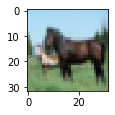

In [34]:
plotImage(X[12, :])

We can now implement the whitening of the images. [Pal & Sudeep (2016)](https://ieeexplore.ieee.org/document/7808140/) describe the process:

1. The first step is to rescale the images to obtain the range \[0, 1\] by dividing by 255 (the maximum value of the pixels).

Recall that the formula to obtain the range \[0, 1\] is: